In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np
from scipy.linalg import triu

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from pprint import pprint

import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()

import pickle

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpera

C:\Users\melis\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


<h1> Encapsulate Functionality </h1><br><sup><h3> Data Aggregation and Data Pre-Processing</h3></sup>


<ul>
    <li> <b> Variables URL and review_div_class </b> </li> 
</ul>
<ol>    
<li> Below I have stored the url of the website I am scraping into variable URL.</li>
<li> The inspected web page div class is stored as variable review_div_class.</li>
    <ul>
        <li><b>Class Get Reviews</b> </li> </ul>
    <li> The first method definition is defined inside the class GetReviews as a constructor.</li>
    <li> Here I have initialized self, base_url, review_div_class as parameters which can be called when the class is instantiated. </li>
    <li> The next method is defined as <b> scrape_reviews</b>.
    <li> Here I am creating a utility function which will be used by another function. </li>
    <li> The response variable is to store the <b>GET</b> http request from the <b>URL</b>(page_url).</li>
    <li> The soup variable is where the BeautifulSoup object is called to parse the data which will be stored from the response variable. Because I am scraping html, html.parser is passed as a parameter.</li>
    <li> The review_elements variable will contain the correct elements using find_all to search the parsed tree for the correct div as specified in self.review_div_class.</li>
    <li> The next variable reviews is initialized to store the extracted data using a for loop to iterate through each element and extracting only the text. Strip=True is to remove unecessary whitespace from the front and end of a sentence. This will help with minimize data preprocessing ensuring correct format.</li>
    <li> The next method is defined as <b>populate_dataframe</b> for the GetReviews class.</li>
    <li> An empty list is initiated as <b>extracted_data</b> where the preprocessed extracted data will be stored</li>
    <li> During manual inspection, I noticed that the reviews ended with a colon before the string 'Date of experience' was typed and then the date.</li>
    <li> Therefore this method uses a for loop to iterate over each review and splitting the text into two parts at the last colon then stored in variable review_text.</li>
    <li> The variable review_date is then written to store the second part of the split which contains the date and the string 'Date of experience'.</li> 
    <li> .rstrip is then implemented to remove the string 'Date of experience'</li>
    <li> A new dictionary is then created to store the value key pairs stored in the variables which then becomes the df columns. </li>
    <li> The final method is defined as get_df inside the GetReviews class.</li>
    <li> It has two parameters, self and pages which was set at 18 because there was 18 pages of reviews for the company on trustpilot</li>
    <li> An empty list is then stored in a new variable called all_reviews to store all reviews</li>
    <li> Another for loop is used to iterate over all the pages with a plus 1 as python starts counting at 0</li>
    <li> The print function shows the process by printing each page as it is being scraped</li>
    <li>  The final sections of the class method, formats the url for each page and extends this to a list, this list is then used to populate the dataframe</li>
    <li> The class GetReviews is then applied with the parameters url, review_div_class, which initiates the object as scraper which is then passed to the function get_df and stored into a df</li>
</ol>

In [2]:
url = "https://www.trustpilot.com/review/buseireann.ie"
review_div_class = 'styles_reviewContent__0Q2Tg'

class GetReviews:
    def __init__(self, base_url, review_div_class):
        self.base_url = base_url 
        self.review_div_class = review_div_class
        # this is a constructor
        # constructors are used to create a class with some parameters, in this case parameter we have 2 parameters.
        # base_url
        # review_div_class
        # parameters are just a variable, that can be referanced in the class for data operations after it got assigned. 

    def scrape_reviews(self, page_url):
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        review_elements = soup.find_all('div', class_=self.review_div_class)
        reviews = [review.get_text(strip=True) for review in review_elements]
        return reviews

    def populate_dataframe(self, reviews):
        extracted_data = []
        for review in reviews:
            # Split the review into text and date at the last colon (:)
            parts = review.rsplit(':', 1)
            review_text = parts[0].strip() if len(parts) > 0 else ""
            review_date = parts[1].strip() if len(parts) > 1 else ""

            # Remove "Date of experience" from the review text
            review_text = review_text.rstrip('Date of experience')

            extracted_data.append({'Review': review_text, 'Date Posted': review_date})

        df = pd.DataFrame(extracted_data)
        
        df['Date Posted'] = pd.to_datetime(df['Date Posted'])
        
        return df

    def get_df(self, pages=18):
        all_reviews = []
        for page in range(1, pages + 1):
            print(f"Scraping page {page}")
            page_url = f"{self.base_url}?page={page}"
            page_reviews = self.scrape_reviews(page_url)
            all_reviews.extend(page_reviews)
        df = self.populate_dataframe(all_reviews)
        return df
scraper = GetReviews(url, review_div_class)
df = scraper.get_df()
    
print(df)


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
                                                Review Date Posted
0    conyaThey are never on time for one and Im her...  2024-01-02
1    Worst transport in IrelandThis bus service is ...  2024-01-03
2    Has to be the worst transport service…Has to b...  2023-12-29
3    The most unreliable serviceNo only are we unsu...  2023-12-11
4    So uselessSo useless. The bus times and schedu...  2023-12-09
..                                                 ...         ...
351  Not reliable one bitNot reliable one bit,why d...  2019-12-01
352  Bus Eireann....Bus Eireann..... Where do I sta...  2019-09-30
353  Not sure how can be defined as…Not sure how ca...  2019-09-24
354  Worst customer serviceWorst 

In [3]:
df.head()

,Review,Date Posted
0,conyaThey are never on time for one and Im her...,2024-01-02
1,Worst transport in IrelandThis bus service is ...,2024-01-03
2,Has to be the worst transport service…Has to b...,2023-12-29
3,The most unreliable serviceNo only are we unsu...,2023-12-11
4,So uselessSo useless. The bus times and schedu...,2023-12-09


In [4]:
# Access the full sentence in row n of the 'Review' column
review_sentence = df.iloc[5]['Review']

print(review_sentence)

Bus Eireann service is the worstBus Eireann service is the worst, it’s the slowest bus, 2h journey from Wicklow to Dublin and the drivers are mean, impolite and unhelpful. I’m on the bus now, I asked the driver to turn off the lights in the bus as it’s early in the morning and it’s dark and asked him as well to put the heating, he did none of it, gave out to me and raised his voice on me.


In [5]:
df.dtypes

Review                 object
Date Posted    datetime64[ns]
dtype: object

In [6]:
min_date = df['Date Posted'].min()
max_date = df['Date Posted'].max()
print(f"Date range: {min_date} to {max_date}")

Date range: 2019-07-17 00:00:00 to 2024-01-03 00:00:00


In [7]:
#from matplotlib import font_manager, pyplot as plt
#
#def plot_histogram(df, font_path='dum1.ttf', font_size=36, figsize=(14,8), bins=30, color='darkblue', linewidth=2):
#    # Load the font
#    font_prop = font_manager.FontProperties(fname=font_path, size=font_size)
#
#    # Convert 'Date Posted' to datetime
#    df['Date Posted'] = pd.to_datetime(df['Date Posted'])
#
#    # Create a figure and axis
#    fig, ax = plt.subplots(figsize=figsize)
#
#    # Create a histogram of the 'Date Posted' column
#    df['Date Posted'].hist(rwidth=0.9, bins=bins, color=color, ax=ax)
#
#    # Use the font in the title
#    title_text = 'Bus Eirenn Reviews\n' + 'Frequencies from trustpilot'
#    ax.set_title(title_text, fontproperties=font_prop, fontsize=font_size, y=1.20)
#
#    # Make x and y axis lines bold
#    ax.spines['left'].set_linewidth(linewidth)
#    ax.spines['bottom'].set_linewidth(linewidth)
#
#    # Set labels
#    ax.set_xlabel('Date')
#    ax.set_ylabel('Number of Posts')
#
#    # Remove grid lines (both minor and major)
#    ax.grid(False)
#
#    # Remove top and right border lines
#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)
#
#    # Show the plot
#    plt.show()
#

In [8]:
# plot_histogram(df)

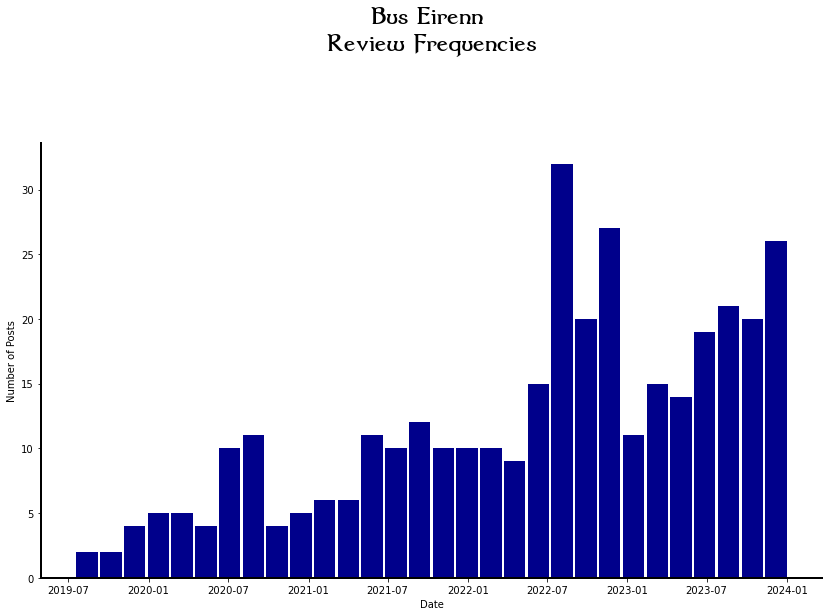

In [9]:
from matplotlib import font_manager, pyplot as plt

# Load selected font
font_path = 'dum1.ttf' 
font_prop = font_manager.FontProperties(fname=font_path, size=36)  # Increase font size

# change 'Date Posted' dtype to datetime
df['Date Posted'] = pd.to_datetime(df['Date Posted'])

fig, ax = plt.subplots(figsize=(14,8))

# Create a histogram of the 'Date Posted' column
df['Date Posted'].hist(rwidth=0.9, bins=30, color='darkblue', ax=ax) 

title_text = 'Bus Eirenn \n' + 'Review Frequencies'
ax.set_title(title_text, fontproperties=font_prop, fontsize=30, y=1.20)

# Make x and y axis lines bold
ax.spines['left'].set_linewidth(2)   # Make the left axis line bold
ax.spines['bottom'].set_linewidth(2) # Make the bottom axis line bold

# Set labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Posts')

# Remove grid lines (both minor and major)
ax.grid(False)

# Remove top and right border lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()



In [10]:
topic = pd.DataFrame({
    'text': df['Review'],
    'date_posted' : df['Date Posted']
})

In [11]:
topic.head()

,text,date_posted
0,conyaThey are never on time for one and Im her...,2024-01-02
1,Worst transport in IrelandThis bus service is ...,2024-01-03
2,Has to be the worst transport service…Has to b...,2023-12-29
3,The most unreliable serviceNo only are we unsu...,2023-12-11
4,So uselessSo useless. The bus times and schedu...,2023-12-09


In [12]:
# cleaning the text for text analysis
# removing stop words or fillers
# removing bus eireann, topic we already know
# remove emojis

import re

def clean_text(text):
    
    text = re.sub(r'([^a-zA-Z0-9_])([A-Z])', r'\1 \2', text) #spaces where there is .. or ! before a capital letter to make a sapce
    
    text = re.sub(r'(^|[a-z0-9])([A-Z]+)', r'\1 \2', text) #makes a space between characters such as theBus
    
    stop_words = set(stopwords.words('english'))

    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    
    text = re.sub(r'\bbus\b|\beireann\b', '', text, flags=re.I)

    
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text



In [13]:
topic['clean_text'] = topic['text'].apply(clean_text)

In [14]:
topic.tail()

,text,date_posted,clean_text
351,"Not reliable one bitNot reliable one bit,why d...",2019-12-01,"Not reliable one bit Not reliable one bit,why ..."
352,Bus Eireann....Bus Eireann..... Where do I sta...,2019-09-30,".... ..... Where I start? Always never time, p..."
353,Not sure how can be defined as…Not sure how ca...,2019-09-24,Not sure defined Not sure defined service?! Bu...
354,Worst customer serviceWorst customer service. ...,2019-08-28,Worst customer service Worst customer service....
355,Absolutely awful service!!Absolutely awful ser...,2019-07-17,Absolutely awful service!! Absolutely awful se...


In [15]:
long_string = ' '.join(topic['clean_text'])
len(long_string)

104085

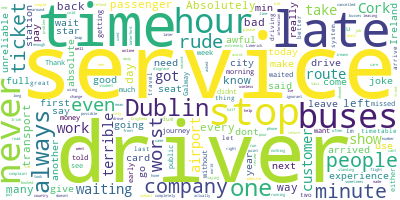

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color='white',
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=False,
)

wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
# function to process the sentences to have a list of words for each sentence
# This is a preprocessing step for Topic modelling

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [18]:
texts = topic['clean_text'].values.tolist() # converting clean_text column to a list
words = list(sent_to_words(texts)) # applying the function to have a list of words for each sentence

In [19]:
words[4] # quick check it worked

['so',
 'useless',
 'so',
 'useless',
 'the',
 'times',
 'schedules',
 'difficult',
 'predict',
 'irish',
 'weather',
 'standing',
 'stop',
 'parnell',
 'avenue',
 'galway',
 'missed',
 'scheduled',
 'departures',
 'you',
 'quicker',
 'walking']

In [20]:
# the next preprocessing step is to create a dictionary for Latent Dirichlet Allocation
id2words = corpera.Dictionary(words)

In [21]:
# This step is converting the text into a bag of words to each text in words stored in variable corpus
corpus = [id2words.doc2bow(text) for text in words]

In [22]:
corpus # quick check to see if it worked

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1)],
 [(5, 2),
  (6, 1),
  (8, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 2),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 2),


In [23]:
len(corpus)

356

In [24]:
len(words)

356

In [25]:
# 3, 5 and 10 topics were tested but topics were highly similar, 
# Evidence of this can be seen in the visualisation using 5 topics

num_topics = 5 

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2words,
    num_topics=num_topics,
    random_state=42

)

In [26]:
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model,
    corpus,
    id2words                                     
                                         
)

In [27]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.022196 -0.026231       1        1  32.755918
3      0.008773  0.031297       2        1  21.796670
2     -0.006864  0.006598       3        1  20.382444
1     -0.017199  0.006844       4        1  13.446534
4      0.037486 -0.018508       5        1  11.618434, topic_info=        Term        Freq       Total Category  logprob  loglift
76   service  257.000000  257.000000  Default  30.0000  30.0000
84       the  131.000000  131.000000  Default  29.0000  29.0000
55      late  140.000000  140.000000  Default  28.0000  28.0000
10      time  154.000000  154.000000  Default  27.0000  27.0000
43       get  122.000000  122.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
201     even    5.829219   60.611760   Topic5  -5.6885  -0.1890
5      never    6.230083   99.831555   Topic5  -5.6220  -0.6215
245   ticket    5.526183   49.535050   Topic5  -5.7419  -0.0406
114     hour    5.579384   62.383363   Topic5  -5.7323  -0.2616
11   waiting    5.496421   57.978427   Topic5  -5.7473  -0.2034

[428 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2608      2  0.418777    aboard
2608      4  0.418777    aboard
715       1  0.173293  absolute
715       2  0.346587  absolute
715       3  0.173293  absolute
...     ...       ...       ...
98        1  0.100673      zero
98        2  0.503365      zero
98        3  0.100673      zero
98        4  0.100673      zero
98        5  0.201346      zero

[794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

In [28]:
num_topics = 1 

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2words,
    num_topics=num_topics,
    random_state=42

)

In [29]:
lda_model.print_topics()

[(0,
  '0.017*"service" + 0.010*"time" + 0.010*"driver" + 0.009*"late" + 0.009*"the" + 0.008*"get" + 0.007*"never" + 0.006*"stop" + 0.006*"buses" + 0.006*"drivers"')]

In [30]:
num_topics = lda_model.num_topics

topic_names = {
    0: 'Late Bus Services'
}

for i in range(num_topics):
    topic_terms = lda_model.show_topic(i)
    topic_terms_str = ', '.join([f'{term[0]} ({term[1]:.2f})' for term in topic_terms])
    print(f'{topic_names[i]}: {topic_terms_str}')

Late Bus Services: service (0.02), time (0.01), driver (0.01), late (0.01), the (0.01), get (0.01), never (0.01), stop (0.01), buses (0.01), drivers (0.01)


Late Bus Services: service (0.02), time (0.01), driver (0.01), late (0.01), the (0.01), get (0.01), never (0.01), stop (0.01), buses (0.01), drivers (0.01)


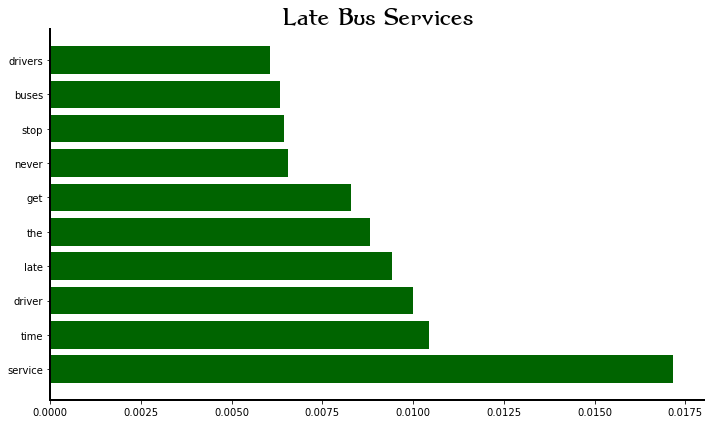

In [31]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import gensim

# Assuming lda_model is your trained LDA model
topic_terms = lda_model.show_topic(0)  # Get the terms for the first (and only) topic
topic_terms_str = ', '.join([f'{term[0]} ({term[1]:.2f})' for term in topic_terms])
print(f'{topic_names[0]}: {topic_terms_str}')

font_path = 'dum1.ttf' 
font_prop = font_manager.FontProperties(fname=font_path, size=36)  # Increase font size

fig, axs = plt.subplots(figsize=(10,6))

title_text = 'Bus Eirenn Reviews\n' + 'Late Bus Service'
axs.set_title(title_text, fontproperties=font_prop, fontsize=30, y=1.20)
axs.spines['left'].set_linewidth(2)   # Make the left axis line bold
axs.spines['bottom'].set_linewidth(2) # Make the bottom axis line bold
axs.grid(False)

# Remove top and right border lines
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# Get the terms and their frequencies
terms, freqs = zip(*[(term[0], term[1]) for term in topic_terms])

# Create a horizontal bar plot for this topic
axs.barh(terms, freqs, color='darkgreen')
axs.set_title(topic_names[0], fontsize=30)

plt.tight_layout()
plt.show()


In [32]:
from collections import Counter

# Flatten the list of lists into a single list of words
flat_words = [word for sublist in words for word in sublist]

# Now you can count the words
word_counts = Counter(flat_words)

# Print the 10 most common words and their counts
print(word_counts.most_common(10))



[('service', 305), ('time', 185), ('driver', 177), ('late', 167), ('the', 156), ('get', 147), ('never', 116), ('stop', 114), ('buses', 112), ('drivers', 107)]


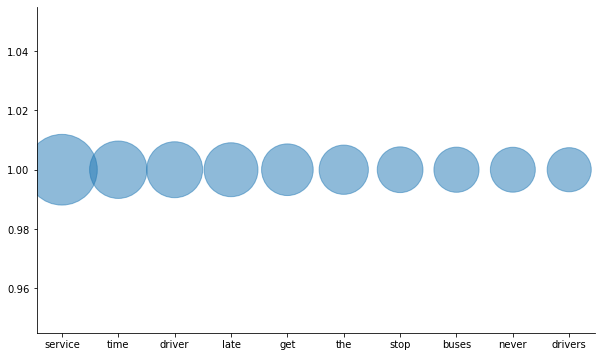

In [33]:
import matplotlib.pyplot as plt

# Assuming `word_counts` is your Counter object with word frequencies
word_counts = {'service': 270, 'time': 178, 'driver': 169, 'late': 157, 'get': 144, 
               'the': 131, 'stop': 113, 'buses': 110, 'never': 109, 'drivers': 105}

# Get the words and their frequencies
words, freqs = zip(*word_counts.items())

# Normalize the frequencies
max_freq = max(freqs)
normalized_freqs = [f/max_freq for f in freqs]

# Create a scatter plot (bubble chart)
plt.figure(figsize=(10,6))
plt.scatter(words, [1]*len(words), s=[f*5000 for f in normalized_freqs], alpha=0.5)  # Use normalized frequencies


plt.yticks()  # Hide the y-axis
plt.gca().spines['left'].set_visible(True)  # Hide the left spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['top'].set_visible(False)  # Hide the top spine

plt.show()


In [34]:
topic['clean_text'][7]

'Dear God... Dear God, company undisputed, absolutely peerless soul crushingly terrible, utterly indifferent hopelessly incompetent "service". This 245 route Cork every hour routinely even bother showing up. Waiting 2 HOURS plainly mind numbing. I looong day I get car longer need despair life. The government really needs remove commission public transport country. I could get actual chimpanzees zoo train better job running transport service. A horrifying experience. -245 stars'

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer 

In [36]:
sia = SentimentIntensityAnalyzer()

In [37]:
sia.polarity_scores("Just went 115 dublin toJust went 115 dublin mullingar heuston 18:50 welcomed driver legs spread chair thats all, going maynooth university change plans get groceries went uni tried leave stop beside train station screamed told sit said ever sees would refuse service atrocious language behaviour wanting get earlier stop. Not consistently cancelled delayed buses also extremely rude drivers. I take weekly never problem wanted leave earlier not. Terrible company another faster would take day terrible ass .") # test

{'neg': 0.228, 'neu': 0.657, 'pos': 0.114, 'compound': -0.8616}

In [38]:
import statistics

def compound_score(clean_text):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(clean_text)]
    return statistics.mean(scores)

In [39]:
compound_score(topic['clean_text'][1])

-0.14563636363636362

In [40]:
print(topic['clean_text'][1])

Worst transport Ireland This service great example anything made built Irish. Doesnt work properly, always late, zero information things happen also completely ignorant problems acting never happen. I get 5 times week. I get anywhere 9am-5pm Dublin anywhere 5pm-3:30am. Out 5 times week two rides late 80-90% time. The rest 10% doesnt show zero explanation. Its actually extremely rare services run smoothly Ive taking service 3 years every week consistently never good. I feel sorry drivers arent bad bar few. But deal poo transport system, poo vehicles, poo government update anything pockets. No one customers read this. But someone reads title fix issue get ass fix something could done couple weeks rather lining pockets money poorer less fortunate people.


In [41]:
topic["Compound Scores"] = topic["clean_text"].apply(compound_score)

In [42]:
topic = topic.drop('text', axis=1) # removing uncleaned text 

In [43]:
topic.head(20)

,date_posted,clean_text,Compound Scores
0,2024-01-02,conya They never time one Im waiting 19:50 got...,-0.381800
1,2024-01-03,Worst transport Ireland This service great exa...,-0.145636
2,2023-12-29,Has worst transport service Has worst transpor...,-0.080933
3,2023-12-11,"The unreliable service No unsure arrive, arriv...",-0.110350
4,2023-12-09,So useless So useless. The times schedules dif...,-0.420150
5,2023-12-08,"service worst service worst, slowest , 2h jour...",-0.311250
6,2023-12-27,Cant even get student ticket peace Just drove ...,0.047533
7,2023-11-15,"Dear God... Dear God, company undisputed, abso...",-0.219637
8,2023-11-17,High fares unreliable services101 Service Dubl...,-0.106987
9,2023-10-27,ireann means ireann means testing one's patien...,-0.166633


In [44]:
topic.sort_values("Compound Scores", ascending=False)

,date_posted,clean_text,Compound Scores
192,2023-06-20,I love fun I love I love fun I love love z,0.9828
200,2022-08-05,The nice great talk The nice great talk great ...,0.9758
92,2023-12-01,always great service good drivers onalways gre...,0.9590
313,2020-09-19,These drivers great job These drivers great jo...,0.9231
291,2021-05-07,"Extremely unreliable Honestly, giving company ...",0.8603
...,...,...,...
176,2023-02-28,Today I experienced horrible Today I experienc...,-0.9146
154,2022-12-13,The worst thing ever experience The worst thin...,-0.9274
137,2022-11-10,Worst service Worst service ever taking long d...,-0.9382
321,2020-08-12,Driver stopping stops The driver stop stop com...,-0.9633


In [45]:
topic['new_group'] = topic['Compound Scores'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [46]:
topic

,date_posted,clean_text,Compound Scores,new_group
0,2024-01-02,conya They never time one Im waiting 19:50 got...,-0.381800,negative
1,2024-01-03,Worst transport Ireland This service great exa...,-0.145636,negative
2,2023-12-29,Has worst transport service Has worst transpor...,-0.080933,negative
3,2023-12-11,"The unreliable service No unsure arrive, arriv...",-0.110350,negative
4,2023-12-09,So useless So useless. The times schedules dif...,-0.420150,negative
...,...,...,...,...
351,2019-12-01,"Not reliable one bit Not reliable one bit,why ...",0.000000,neutral
352,2019-09-30,".... ..... Where I start? Always never time, p...",-0.070975,negative
353,2019-09-24,Not sure defined Not sure defined service?! Bu...,-0.283300,negative
354,2019-08-28,Worst customer service Worst customer service....,-0.452533,negative


In [47]:
import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from wordcloud import WordCloud


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


Below I am using Naive Bayes to classify the positive and negative based on the compound scores. +1 was used to make the values positive as it does not work with negative values. The split was done at 80% and 20%. The results were very bad.

In [48]:
train_df = topic.sample(frac=0.8, random_state=1)
test_df = topic.drop(train_df.index)

# Add 1 to the 'Compound Scores' column
train_df['Compound Scores'] = train_df['Compound Scores'] + 1
test_df['Compound Scores'] = test_df['Compound Scores'] + 1

# Create feature and target variables
X_train = train_df[['Compound Scores']]
y_train = train_df['new_group']
X_test = test_df[['Compound Scores']]
y_test = test_df['new_group']

# Create a MultinomialNB classifier and train it on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Produce a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.63      1.00      0.78        45
     neutral       0.00      0.00      0.00         4
    positive       0.00      0.00      0.00        22

    accuracy                           0.63        71
   macro avg       0.21      0.33      0.26        71
weighted avg       0.40      0.63      0.49        71



C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i